https://github.com/alisa-ludezh
# [Метод головних компонент](https://uk.wikipedia.org/wiki/Метод_головних_компонент)

У цьому завданні вам буде запропоновано ознайомитися з підходом, який перевідкривався в різних областях, має безліч різних інтерпретацій, а також кілька цікавих узагальнень: методом головних компонент (principal component analysis).

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part1" style="color:#808080; text-decoration:none;">Теорія</a></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part2" style="color:#808080; text-decoration:none;">Статистичний погляд на модель</a></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part3" style="color:#808080; text-decoration:none;">Завдання 1. Автоматичне зменшення розмірності даних за допомогою логарифму правдоподібності</a></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part4" style="color:#808080; text-decoration:none;">Варіаційний погляд на модель</a></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part5" style="color:#808080; text-decoration:none;">Завдання 2. Ручне зменшення розмірності ознак за допомогою аналізу дисперсії даних уздовж основних компонентів</a></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part6" style="color:#808080; text-decoration:none;">Інтерпретація основних компонентів</a></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part7" style="color:#808080; text-decoration:none;">Завдання 3. Аналіз основних компонентів з допомогою кореляцій з вихідними ознаками.</a></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part8" style="color:#808080; text-decoration:none;">Інтерпретація головних компонентів з використанням даних</a></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part9" style="color:#808080; text-decoration:none;">Завдання 4. Аналіз головних компонент за допомогою вкладів у їх дисперсію окремих об'єктів</a></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part10" style="color:#808080; text-decoration:none;">Аналіз основних недоліків методу основних компонентів</a></p>

[Приклади PCA (principal component analysis)](https://nbviewer.org/github/pruhlo/notes-for-Data-Science/blob/master/PCA%20example.ipynb)

## Programming assignment

Завдання розбите на дві частини:
- робота з модельними даними,
- робота із реальними даними.

Наприкінці кожного пункту потрібно отримати відповідь і завантажити у відповідну форму у вигляді набору текстових файлів.

In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

## Теорія

<p id='part1'></p>
Будь-який набір даних є матрицею $X$.

Метод головних компонент послідовно знаходить такі лінійні комбінації ознак (компоненти) із $X$:
- кожна компонента ортогональна решті і нормована: $<w_i, w_j> = 0, \quad ||w_i||=1$,
- кожна компонента визначає максимально можливу дисперсію даних (з урахуванням попереднього обмеження).

Припущення, в рамках яких цей підхід працюватиме добре:
- лінійність компонентів: ми припускаємо, що дані можна аналізувати лінійними методами,
- великі дисперсії важливі: передбачається, що найбільш важливими є ті напрямки в даних, вздовж яких вони мають найбільшу дисперсію,
- всі компоненти ортогональні: це припущення дозволяє проводити аналіз основних компонентів за допомогою технік лінійної алгебри (наприклад, сингулярне розкладання матриці $X$ або спектральне розкладання матриці $X^TX$).

Як це виглядає математично?

Позначимо наступним чином вибіркову матрицю коваріації даних $\hat{C} \propto Q = X^TX$. ($Q$ відрізняється від $\hat{C}$ нормуванням на кількість об'єктів).

Сингулярне розкладання матриці $Q$ виглядає так:

$$Q = X^TX = W \Lambda W^T$$

Можна чітко показати, що стовпці матриці $W$ є основними компонентами матриці $X$, тобто. комбінаціями ознак, що задовольняють двом умовам, зазначеним на початку. При цьому дисперсія даних уздовж напрямку, заданого кожною компонентою, дорівнює відповідному значенню діагональної матриці $ Lambda $.

Як на підставі цього перетворення проводити зменшення розмірності? Ми можемо відранжувати компоненти, використовуючи значення дисперсій даних вздовж них.

Зробимо це: $\lambda_{(1)} > \lambda_{(2)} > \dots > \lambda_{(D)}$.

Тоді, якщо ми виберемо компоненти, відповідні першим $d$ дисперсіям з цього списку, ми отримаємо набір з $d$ нових ознак, які найкраще описують дисперсію початкового набору даних серед інших можливих лінійних комбінацій вихідних ознак матриці $X$.
- Якщо $d=D$, то ми взагалі не втрачаємо жодної інформації.
- Якщо $d<D$, ми втрачаємо інформацію, яка, за справедливості зазначених вище припущень, буде пропорційна сумі дисперсій відкинутих компонент.

Виходить, що метод головних компонентів дозволяє нам ранжувати отримані компоненти за "значимістю", а також запустити процес їх відбору.

## приклад

Розглянемо набір даних, який семпльований з багатовимірного нормального розподілу з [матрицею коваріації](https://nbviewer.org/github/pruhlo/notes-for-Data-Science/blob/master/Correlation.ipynb#part1) $C = \begin{pmatrix} 3 & 1 \\ 1 & 2 \end{pmatrix}$.

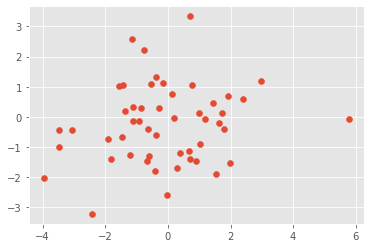

In [3]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3, 1], [1, 2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Шляхом [діагоналізації](https://runebook.dev/ru/docs/numpy/reference/generated/numpy.linalg.eig) істинної матриці коваріації $C$, ми можемо знайти перетворення вихідного набору даних, компоненти якого найкраще описуватимуть дисперсію, з урахуванням їхньої ортогональності один одному:

In [6]:
v, W_true = np.linalg.eig(C)
v # Out: array([3.61803399, 1.38196601])
W_true

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

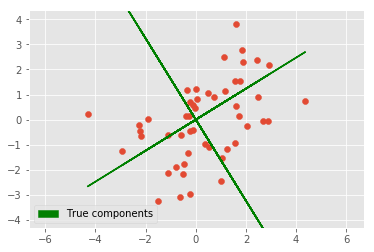

In [3]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:, 0], data[:, 1])
# побудуємо справжні компоненти, вздовж яких максимальна дисперсія даних
plt.plot(data[:, 0], (W_true[0, 0] / W_true[0, 1]) * data[:, 0], color="g") # Вектор 0
plt.plot(data[:, 0], (W_true[1, 0] / W_true[1, 1]) * data[:, 0], color="g") # Вектор 1
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [
    np.minimum(np.amin(data[:, 0]), np.amin(data[:, 1])),
    np.maximum(np.amax(data[:, 0]), np.amax(data[:, 1]))
]
plt.xlim(limits[0], limits[1])
plt.ylim(limits[0], limits[1])
plt.draw()

А тепер порівняємо ці напрямки з напрямками, які обирає метод головних компонентів:

In [5]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:, 0], data[:, 1])
    plt.plot(data[:, 0], -(W_pca[0, 0] / W_pca[0, 1]) * data[:, 0], color="c")
    plt.plot(data[:, 0], -(W_pca[1, 0] / W_pca[1, 1]) * data[:, 0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # зробимо графіки красивими:
    plt.axis('equal')
    limits = [
        np.minimum(np.amin(data[:, 0]), np.amin(data[:, 1])) - 0.5,
        np.maximum(np.amax(data[:, 0]), np.amax(data[:, 1])) + 0.5
    ]
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[0], limits[1])
    plt.draw()

In [16]:
W_pca = model.components_
(W_pca[0, 0] / W_pca[0, 1])*data[:,0]

array([-3.53815964, -3.84016854, -2.67373607,  0.77486795, -6.04501719,
       -1.72869262, -4.73861585,  4.33353394,  5.90911267, -1.20181413,
        2.1625707 ,  2.88878544, -1.44387543, -0.01067812, -1.62206017,
        1.51026155,  2.54814935,  0.81005879,  0.30171335, -5.67356432,
       -3.50862891, -5.00796415, -1.31990665,  1.78555964,  0.64726292,
        3.73687148,  4.61630176,  2.92809452, -7.9948182 ,  3.37445281,
       -0.40994345,  0.11286567, -5.07935031, -3.1931723 ,  2.29814915,
        2.83828611,  2.17553133, -0.25892165,  3.19403809, -2.58772456,
        1.10882879, -0.7708935 ,  2.88231924,  1.02192394,  2.00313733,
        2.78100188,  1.07313383, -6.24725759, -2.04999675,  2.06837152])

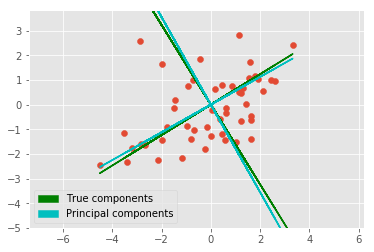

In [9]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:, 0], data[:, 1])
# побудуємо справжні компоненти, вздовж яких максимальна дисперсія даних
plt.plot(data[:, 0], (W_true[0, 0] / W_true[0, 1]) * data[:, 0], color="g")
plt.plot(data[:, 0], (W_true[1, 0] / W_true[1, 1]) * data[:, 0], color="g")
# побудуємо компоненти, отримані з використанням методу PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

Видно, що при невеликій кількості даних вони відрізняються незначно. Збільшимо розмір вибірки:

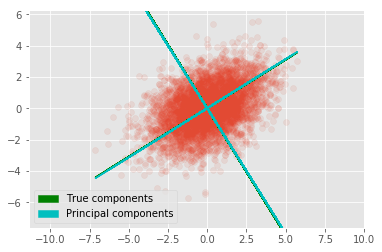

In [16]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:, 0], data_large[:, 1], alpha=0.1)
# побудуємо справжні компоненти, вздовж яких максимальна дисперсія даних
plt.plot(
    data_large[:, 0], (W_true[0, 0] / W_true[0, 1]) * data_large[:, 0],
    color="g")
plt.plot(
    data_large[:, 0], (W_true[1, 0] / W_true[1, 1]) * data_large[:, 0],
    color="g")
# побудуємо компоненти, отримані з використанням методу PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

І тут основні компоненти значно точніше наближають справжні напрями даних, вздовж яких спостерігається найбільша дисперсія.

## Статистичний погляд на модель

<p id='part2'></p>
Як формалізувати припущення вказаного вище методу? За допомогою ймовірнісної моделі!

Завдання, яке стоїть за будь-яким методом зменшення розмірності: отримати з набору зашумлених ознак $X$ істинні значення $Y$, які насправді визначають набір даних (тобто зведення датасету з великою кількістю ознак до даних, що мають т.зв. " ефективну розмірність").

У разі методу головних компонент ми хочемо знайти напрями, вздовж яких максимальна дисперсія, з урахуванням описаних вище припущень структуру даних і компонент.

Матеріал, описаний нижче у цій секції, не обов'язковий ознайомлення до виконання наступного завдання, т.к. потребує деяких знань статистики.

Для тих, хто збирається його пропустити: наприкінці розділу ми отримаємо метрику якості, яка має визначати, наскільки дані добре описуються побудованою моделлю при заданій кількості компонентів. Відбір ознак при цьому зводиться до того, що ми вибираємо ту кількість компонент, при якому метрика (логарифм правдоподібності), що використовується, є максимальною.

З урахуванням припущень завдання методу головних компонентів виглядає так:

$$ x = Wy + \mu + \epsilon$$

де:
- $x$ -- дані, що спостерігаються
- $W$ - матриця головних компонент (кожен стобець - одна компонента)
- $y$ -- їх проекція на основні компоненти
- $\mu$ -- середнє спостережуваних даних
- $\epsilon \sim \mathcal{N}(0, \sigma^2I)$ -- нормальний шум

Виходячи з розподілу шуму, випишемо розподіл на $x$:

$$p(x \mid y) = \mathcal{N}(Wx + \mu, \sigma^2I) $$

Введемо апріорний розподіл на $y$:

$$p(y) = \mathcal{N}(0, 1)$$

Виведемо з цього за допомогою формули Байєса маргінальний розподіл $p(x)$:

$$p(x) = \mathcal{N}(\mu, \sigma^2I + WW^T)$$

Тоді правдоподібність набору даних за умови використовуваної моделі виглядає так:

$$\mathcal{L} = \sum_{i=1}^N \log p(x_i) = -N/2 \Big( d\log(2\pi) + \log |C| + \text{tr }(C^{-1}S) \Big)$$

де:
- $C = \sigma^2I + WW^T$ - матриця коваріації в маргінальній моделі
- $S = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)(x_i - \mu)^T$ -- вибіркова коваріація

Значення $\mathcal{L}$ має сенс логарифму ймовірності отримання набору даних $X$ за умови, що він задовольняє припущенням моделі методу основних компонентів. Чим воно більше - тим краще модель описує дані, що спостерігаються.

## Завдання 1. Автоматичне зменшення розмірності даних за допомогою логарифму правдоподібності $\mathcal{L}$


<p id='part3'></p>

Розглянемо набір даних розмірності $D$, чия реальна розмірність значно менше спостережуваної (назвемо $d$). Від вас вимагається:

1. Для кожного значення $\hat{d}$ в інтервалі [1,D] побудувати модель PCA з $\hat{d}$ головними компонентами.
2. Оцінити середній логарифм правдоподібності даних кожної моделі на генеральної сукупності, використовуючи метод крос-валідації з 3 фолдами (підсумкова оцінка значення логарифму правдоподібності усереднюється за всіма фолдам).
3. Знайти модель, на яку він максимальний, і внести у файл відповіді число компонент у цій моделі, тобто. значення $\hat{d}_{opt}$.

Для оцінки логарифму правдоподібності моделі для заданого числа головних компонентів за допомогою методу крос-валідації використовуйте такі функції:

    model = PCA(n_components=n)
    scores = cv_score(model, data)
        
Зверніть увагу, що scores - це вектор, довжина якого дорівнює числу фолдів. Для отримання оцінки правдоподібності моделі його значення потрібно усереднити.

Для візуалізації оцінок можна використовувати таку функцію:

    plot_scores(d_scores)
    
котрої на вхід передається вектор отриманих оцінок логарифму правдоподібності даних для кожного $\hat{d}$.

Для тих, хто цікавиться: дані для завдань 1 і 2 були згенеровані відповідно до передбачуваної PCA моделлю. Тобто: дані $Y$ з ефективною розмірністю $d$, отримані з незалежних рівномірних розподілів, лінійно трансформовані випадковою матрицею $W$ у простір розмірністю $D$, після чого до всіх ознак був доданий незалежний нормальний шум з дисперсією $\sigma$ .

In [27]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.238399,-1.311330,-0.782298,-0.341821,0.469353,-0.431860,0.602948,1.220206,1.525103,-0.991354,...,-0.559927,-0.532534,-0.465923,0.874697,-0.108972,-0.080328,0.448971,2.080754,-1.535373,-0.460125
1,-0.223940,-1.277836,-0.202433,-0.317682,0.081900,-0.624267,-0.577119,-0.489564,0.704099,-0.511071,...,-0.055943,-2.208109,0.027813,-1.663044,0.018190,-0.432993,1.204321,0.705121,-1.106140,0.145533
2,-0.278740,1.342790,-0.734591,0.618881,1.365690,-1.397553,-1.446412,-0.844917,0.845916,-1.574979,...,-1.616313,2.144484,-1.110290,-0.524140,-2.176645,-1.903969,1.715735,0.054220,-1.125896,1.309994
3,0.585189,0.344587,1.512917,0.272105,0.480314,-0.688009,-1.473050,-0.732295,0.407361,0.900369,...,1.107443,-0.948995,0.555096,0.645465,1.291971,0.690657,-0.322088,0.341865,-1.436627,0.231027
4,0.992821,-0.654237,2.431634,-1.167275,0.347093,0.772373,0.766213,-0.441367,0.632604,1.543905,...,0.088682,1.357311,0.739249,-0.213874,0.521273,-0.885125,-1.262695,0.974920,1.139357,-0.104045


In [83]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score, KFold


def plot_scores(d_scores):
    n_components = np.arange(1, d_scores.size + 1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()


def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))


data = pd.read_csv('data_task1.csv')

arr_s = []
for d in range(1,data.shape[1]+1):
    model_1 = PCA(n_components=d)
    model_1.fit(data)
    res = cv_score(model_1, data, cv=3)
    arr_s.append(res.mean())

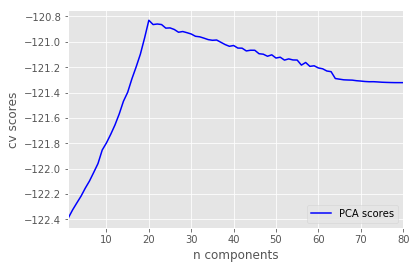

In [91]:
plot_scores(np.array(arr_s))

In [86]:
write_answer_1(arr_s.index(max(arr_s))+1)

## Варіаційний погляд на модель

<p id='part4'></p>

Ми знаємо, що кожній **головній компоненті відповідає** описувана їй **дисперсія** даних (дисперсія даних при проекції цього компоненту). **Вона чисельно дорівнює значенню діагональних елементів матриці** $ Lambda $, **одержуваної з спектрального розкладання матриці коваріації даних** (див. теорію вище).

Виходячи з цього, ми можемо відсортувати дисперсію даних вздовж цих компонентів за спаданням, і зменшити розмірність даних, відкинувши $q$ підсумкових основних компонентів, що мають найменшу дисперсію.

Робити це можна двома різними способами. Наприклад, якщо ви далі навчаєте на даних із зменшеною розмірністю модель класифікації чи регресії, можна запустити ітераційний процес: видаляти компоненти з найменшою дисперсією по одній, поки якість підсумкової моделі стане значно гірше.

Більш загальний спосіб відбору ознак полягає в тому, що ви можете подивитися на різниці в дисперсіях у відсортованому ряді $\lambda_{(1)} > \lambda_{(2)} > \dots > \lambda_{(D)}$: $ \lambda_{(1)}-\lambda_{(2)}, \dots, \lambda_{(D-1)} - \lambda_{(D)}$, і видалити ті компоненти, на яких різниця буде найбільшою. Саме цим методом вам пропонується скористатися для тестового набору даних.

## Завдання 2. Ручне зменшення розмірності ознак за допомогою аналізу дисперсії даних уздовж основних компонентів

<p id='part5'></p>

Розглянемо ще один набір даних розмірності $ D $, чия реальна розмірність значно менше спостерігається (назвемо її також $ d $). Від вас вимагається:

1. Побудувати модель PCA із $D$ головними компонентами за цими даними.
2. Спроектувати дані на основні компоненти.
3. Оцінити їх дисперсію вздовж основних компонент.
4. Відсортувати дисперсії в порядку убування та отримати їх попарні різниці: $lambda_{(i-1)} - \lambda_{(i)}$.
5. Знайти різницю з найбільшим значенням і отримати оцінку на ефективну розмірність даних $\hat{d}$ .
6. Побудувати графік дисперсій і переконатися, що отримана оцінка $hat{d}_{opt}$ дійсно має сенс, після цього внести отримане значення $\hat{d}_{opt}$ у файл відповіді.

Для створення моделі PCA використовуйте функцію:

    model.fit(data)
    
Для трансформації даних використовуйте метод:

    model.transform(data)
    
Оцінку дисперсій на трансформованих даних вам потрібно буде реалізувати вручну. Для побудови графіків можна скористатися функцією

    plot_variances(d_variances)
    
якої слід передати на вхід відсортований за зменшенням вектор дисперсій уздовж компонент.

Суть завдання полягає в тому, щоб дані розмірності D перетворити на дані меншої розмірності d, при цьому втративши мінімум інформації. Для чого пропонується проаналізувати дисперсії ознак по всіх компонентах після відображення даних у простір з певними властивостями (зазначені на початку зошита).

Іншими словами, спочатку вам пропонується знайти вектори (D штук) за допомогою класу sklearn.decomposition.PCA, які стануть базисом нового простору. Для чого необхідно створити екземпляр даного класу з параметрами за замовчуванням та використовувати метод fit() з пропонованими даними як аргумент. Потім відобразити дані в новий простір такої ж розмірності (D) за допомогою методу transform() і знайти дисперсії проекцій запропонованих даних вектора базису даного простору. Власне проекції ви отримали, коли відобразили дані методом transform(). Ці проекції є координати об'єктів у новому просторі. Таким чином, залишилося просто порахувати їх, наприклад, скориставшись методом std (axis = 0). Після чого, слідуючи описаному в завданні алгоритму знайти d, тобто кількість компонентів, дисперсія вздовж яких значно вища, ніж уздовж інших (пік у різницях відповідає стрибку в ряді впорядкованих дисперсій). Це і буде шукана розмірність простору.

Те, що повертає функція np.std() залежить від того, яке значення приймає параметр axis. Якщо None (за замовчуванням), то поверне число, що дорівнює дисперсії порахованої на всіх елементах масиву, якщо якесь ціле число, то дисперсії пораховані вздовж зазначеної осі (тобто вектор), якщо картеж, то дисперсії пораховані вздовж зазначених осей масиву (Тобто масив).

Дисперсію треба вважати на трансформованих за допомогою методу transform() даних.

А у формулі про яку ви говорите не просто вважається дисперсія, а відбувається відображення вихідних даних у новий простір та підрахунок дисперсії (Х – матриця об'єктів у вихідному просторі).

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()
    
def write_answer_2(optimal_d):
    with open("pca_answer2.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task2.csv')

d=data.shape[1]
model_2 = PCA(n_components=d)
model_2.fit(data)
data_2a = model_2.transform(data)
std_value = np.std(data_2a, axis=0)
print(std_value.shape)
razn = (0,0)
for x in range(1, std_value.shape[0]):
    razn = (abs(std_value[x] - std_value[x-1]), x) if abs(std_value[x] - std_value[x-1])>razn[0] else razn

plot_variances(std_value)
write_answer_2(razn[1])

FileNotFoundError: [Errno 2] No such file or directory: 'data_task2.csv'

## Інтерпретація основних компонентів

<p id='part6'></p>
Як головні компоненти ми отримуємо лінійні комбінації вихідних призанків, тому резонно виникає питання їх інтерпретації.

Для цього є кілька підходів, ми розглянемо два:
- розрахувати взаємозв'язки основних компонентів з вихідними ознаками
- розрахувати вклади кожного конкретного спостереження до основних компонентів

Перший спосіб підходить у тому випадку, коли всі об'єкти з набору даних не несуть нам жодної семантичної інформації, яка вже не відображена в наборі ознак.

Другий спосіб підходить для випадку, коли дані мають складнішу структуру. Наприклад, особи для людини мають більший семантичний зміст, ніж вектор значень пікселів, які аналізує PCA.

Розглянемо докладніше спосіб 1: він полягає у підрахунку коефіцієнтів кореляцій між вихідними ознаками та набором основних компонентів.

Оскільки метод основних компонентів є лінійним, то пропонується для аналізу використовувати кореляцію Пірсона, вибірковий аналог якої має таку формулу:

$$r_{jk} = \frac{\sum_{i=1}^N (x_{ij} - \bar{x}_j) (y_{ik} - \bar{y}_k)}{\sqrt{ \sum_{i=1}^N (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^N (y_{ik} - \bar{y}_k)^2}} $$

де:
- $\bar{x}_j$ -- середнє значення j-ї ознаки,
- $\bar{y}_k$ - середнє значення проекції на k-ю головну компоненту.

Кореляція Пірсона є мірою лінійної залежності. Вона дорівнює 0 у разі, коли величини незалежні, і $ pm 1 $, якщо вони лінійно залежні. З ступеня кореляції нової компоненти з вихідними ознаками, можна будувати її семантичну інтерпретацію, т.к. сенс вихідних ознак ми знаємо.

## Завдання 3. Аналіз основних компонентів з допомогою кореляцій з вихідними ознаками.

<p id='part7'></p>
1. Навчіть метод основних компонентів на датасеті iris, отримайте перетворені дані.
2. Порахуйте кореляції вихідних ознак зі своїми проекціями перші дві основні компоненти.
3. Для кожної ознаки знайдіть компонент (з двох побудованих), з яким він корелює найбільше.
4. На підставі п.3 згрупуйте ознаки компонентів. Складіть два списки: список номерів ознак, які сильніше корелюють із першою компонентою, і такий самий список для другої. Нумерацію розпочинати з одиниці. Передайте обидва списки write_answer_3.

Набір даних складається із 4 ознак, порахованих для 150 ірисів. Кожен із них належить одному з трьох видів. Візуалізацію проекції датасета на два компоненти, які описують найбільшу дисперсію даних, можна отримати за допомогою функції

    plot_iris(transformed_data, target, target_names)
    
на вхід якої потрібно передати дані, перетворені за допомогою PCA, а також інформацію про класи. Колір крапок відповідає одному з трьох видів ірису.

Щоб отримати імена вихідних ознак, використовуйте наступний список:

    iris.feature_names
    
При підрахунку кореляцій не забудьте центрувати ознаки та проекції на головні компоненти (віднімати їх середнє).

In [144]:
import itertools

In [5]:
from sklearn import datasets

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.show()
    
def write_answer_3(list_pc1, list_pc2):
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))

# завантажимо датасет iris
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Навчимо модель, перетворимо дані
model_3 = PCA()
model_3.fit(data)
data_3a = model_3.transform(data)

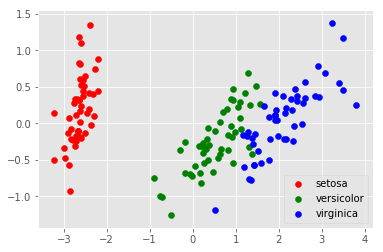

In [416]:
# Графік проекцій на компоненти
plot_iris(data_3a, target, target_names)

In [423]:
scaler_1 = StandardScaler()
data_scaled = scaler_1.fit_transform(data)

In [424]:
scaler_2 = StandardScaler()
data3a_scaled = scaler_2.fit_transform(data_3a)

In [446]:
# кореляції вихідних ознак зі своїми проекціями перші дві основні компоненти.

xj_ave, yk_ave = data.mean(0), data_3a.mean(0)
cor_m = [[sum(data_scaled[:,j]*data3a_scaled[:,k])/(sum(data_scaled[:,j]**2)*sum((data3a_scaled[:,k])**2))**0.5 for k in range(2)] for j in range(data.shape[1])]     
df = pd.DataFrame(cor_m)
df

,0,1
0,0.897545,0.390231
1,-0.389993,0.828313
2,0.997854,-0.049030
3,0.966484,-0.048180


In [453]:
# 3. Для кожної ознаки знайдіть компонент (з двох побудованих), з яким він корелює найбільше.
# 4. З п.3 згрупуйте ознаки по компонентам. Складіть два списки: список номерів ознак, які сильніше 
#корелюють із першою компонентою, і такий самий список для другої. Нумерацію розпочинати з одиниці. 
#Передайте обидва списки write_answer_3.

arr1,arr2 = [],[]
for index, x in enumerate(cor_m):
    arr1.append(index+1) if (x[0]>x[1]) else arr2.append(index+1)
print(arr1, arr2)
write_answer_3(arr1, arr2)

[1, 3, 4] [2]


### info
- aMasked = np.ma.array(a, mask = (a < -9998), copy=True)

- np.info(np.true_divide)

- itertools.chain()

- itertools.product(*iterables, repeat=1) - аналог вкладених циклів

## Інтерпретація головних компонентів з використанням даних
<p id='part8'></p>
Розглянемо тепер величину, яку можна проінтерпретувати, як квадрат косинуса кута між об'єктом вибірки та головною компонентою:

$$cos^2_{ik} = \frac{f_{ik}^2}{\sum_{\ell=1}^d f_{i\ell}^2} $$

де
- i - номер об'єкта
- k - номер головного компонента
- $f_{ik}$ -- модуль центрованої проекції об'єкта на компоненту

Очевидно, що

$$ \sum_{k=1}^d cos^2_{ik} = 1 $$

Це означає, що кожного об'єкта ми у вигляді даної величини отримали ваги, пропорційні вкладу, яку вносить даний об'єкт у дисперсію кожної компоненти. Чим більший внесок, тим більше значимий об'єкт для опису конкретної головної компоненти.

## Завдання 4. Аналіз головних компонент за допомогою вкладів у їх дисперсію окремих об'єктів
<p id='part9'></p>
1. Завантажте датасет осіб Olivetti Faces та навчіть на ньому модель RandomizedPCA (використовується при великій кількості ознак і працює швидше, ніж звичайний PCA). Отримайте проекції ознак на 10 перших основних компонентів.
2. Порахуйте для кожного об'єкта його відносний внесок у дисперсію кожної з 10 компонентів, використовуючи формулу з попереднього розділу (d = 10).
3. Для кожної компоненти знайдіть і візуалізуйте особу, яка робить найбільший відносний внесок у неї. Для візуалізації використовуйте функцію

        plt.imshow(image.reshape(image_shape))
        
4. Передайте у функцію write_answer_4 список номерів осіб з найбільшим відносним вкладом у дисперсію кожної з компонентів, список починається з 0.

In [13]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import RandomizedPCA

def write_answer_4(list_pc):
    with open("pca_answer4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc]))

data = fetch_olivetti_faces(shuffle=True, random_state=0).data
image_shape = (64, 64)

In [3]:
(pd.DataFrame(data)).head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.669421,0.636364,0.648760,0.685950,0.710744,0.760331,0.768595,0.805785,0.793388,0.809917,...,0.227273,0.223140,0.219008,0.115702,0.090909,0.090909,0.095041,0.086777,0.082645,0.074380
1,0.768595,0.756198,0.743802,0.743802,0.752066,0.747934,0.735537,0.702479,0.714876,0.747934,...,0.157025,0.061983,0.152893,0.247934,0.417355,0.533058,0.504132,0.483471,0.628099,0.652893
2,0.371901,0.347107,0.367769,0.380165,0.417355,0.438017,0.462810,0.553719,0.636364,0.685950,...,0.590909,0.640496,0.669421,0.652893,0.685950,0.714876,0.723140,0.706612,0.681818,0.549587
3,0.280992,0.359504,0.404959,0.446281,0.549587,0.578512,0.607438,0.652893,0.665289,0.719008,...,0.500000,0.847107,0.888430,0.607438,0.438017,0.690083,0.611570,0.537190,0.260331,0.144628
4,0.376033,0.475207,0.574380,0.640496,0.661157,0.698347,0.723140,0.747934,0.772727,0.780992,...,0.326446,0.347107,0.355372,0.355372,0.293388,0.185950,0.305785,0.380165,0.363636,0.417355


f¯k - середня проекція об'єктів вибірки на k-у компоненту.

f¯k=∑li=1xikl ,

де xik – проекція i-ого об'єкта на k-у компоненту.

Можливо, автори вважали це очевидним чи забули написати.

In [18]:
data_4a

array([[  8.15799952e-01,   4.14403677e+00,   2.48326373e+00, ...,
          7.35507580e-03,   8.77822097e-03,   1.87801561e-08],
       [  3.86336565e+00,   1.33456612e+00,   5.42396498e+00, ...,
          6.49461348e-04,   6.52124267e-03,   2.74586455e-07],
       [  4.86993599e+00,   5.58655977e-01,   8.84198487e-01, ...,
          5.98023273e-03,   1.35436216e-02,   3.72375325e-07],
       ..., 
       [  2.00346923e+00,   1.84495437e+00,   5.75458956e+00, ...,
          7.61447661e-03,   3.66862048e-03,   1.75242349e-07],
       [  1.97052526e+00,   3.37870979e+00,   2.06998301e+00, ...,
          1.53094176e-02,   1.57024097e-02,   2.86693648e-07],
       [  4.10523558e+00,   1.99171817e+00,   5.97197674e-02, ...,
          3.57078179e-03,   3.71854454e-02,   1.15563125e-07]], dtype=float32)

In [17]:
np.array([[x[k] for k in range(10)] for x in data_4a])

array([[ 0.81579995,  4.14403677,  2.48326373, ...,  2.16425037,
         0.25087184,  0.60279912],
       [ 3.86336565,  1.33456612,  5.42396498, ...,  0.40704846,
         1.07055593,  0.48819274],
       [ 4.86993599,  0.55865598,  0.88419849, ...,  1.26946938,
         2.12874317,  1.61979187],
       ..., 
       [ 2.00346923,  1.84495437,  5.75458956, ...,  0.65327519,
         1.54342091,  1.48301995],
       [ 1.97052526,  3.37870979,  2.06998301, ...,  0.71892405,
         0.81432712,  1.00475895],
       [ 4.10523558,  1.99171817,  0.05971977, ...,  0.93031937,
         0.6827603 ,  1.26282108]], dtype=float32)

In [1]:
import pdb

In [ ]:
pdb.set_trace()
model_4 = RandomizedPCA()
model_4.fit(data)
data_4a = model_4.transform(data)

#2. Порахуйте для кожного об'єкта його відносний внесок у дисперсію кожної з 10 компонентів,
# Використовуючи формулу з попереднього розділу (d = 10).

means = data_4a.sum(axis=0)/data_4a.shape[0] # ср-ие значения столбцов
data_4a = np.abs(data_4a - means)

res = np.array([[x[k]**2/sum(x**2) for k in range(10)] for x in data_4a])
        
#3.Для кожної компоненти знайдіть та візуалізуйте особу, яка вносить найбільший
#відносний внесок у неї. Для візуалізації використовуйте функцію plt.imshow(..)

most_important_faces = res.argmax(0)
most_important_faces.sort()
# Drawing subplots
fig = plt.figure(figsize=(25, 19))
for ix, f in enumerate(most_important_faces):
    plt.subplot(3, 4, ix+1)
    plt.imshow(data[f].reshape(image_shape)) #, cmap=cm.gray)
write_answer_4(most_important_faces)

--Return--
> <ipython-input-2-224e4c56e002>(1)<module>()->None
-> pdb.set_trace()
(Pdb) args
(Pdb) next
> /home/utk/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py(2865)run_code()
-> sys.excepthook = old_excepthook
(Pdb) next
> /home/utk/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py(2881)run_code()
-> outflag = False
(Pdb) b 9
*** Blank or comment
(Pdb) b 10
*** Blank or comment


## Аналіз основних недоліків методу основних компонентів
<p id='part10'></p>
Розглянуті вище завдання, безумовно, є модельними, тому що дані для них були згенеровані відповідно до припущень методу головних компонент. Насправді ці припущення, природно, виконуються які завжди. Розглянемо типові помилки PCA, які слід пам'ятати перед тим, як його застосовувати.

### Напрямки з максимальною дисперсією в даних неортогональні

Розглянемо випадок вибірки, яка згенерована із двох витягнутих нормальних розподілів:

/home/utk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


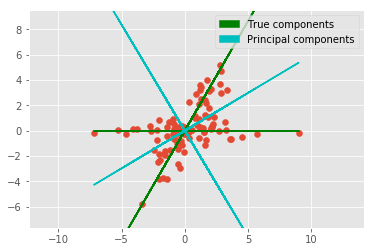

In [556]:
C1 = np.array([[10,0],[0,0.5]])
phi = np.pi/3
C2 = np.dot(C1, np.array([[np.cos(phi), np.sin(phi)],
                          [-np.sin(phi),np.cos(phi)]]))

data = np.vstack([np.random.multivariate_normal(mu, C1, size=50),
                  np.random.multivariate_normal(mu, C2, size=50)])
plt.scatter(data[:,0], data[:,1])
# построим истинные интересующие нас компоненты
plt.plot(data[:,0], np.zeros(data[:,0].size), color="g")
plt.plot(data[:,0], 3**0.5*data[:,0], color="g")
# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

У чому проблема, чому PC тут працює погано? Відповідь проста: цікаві для нас компоненти в даних кореловані між собою (або неортогональні, залежно від того, якою термінологією користуватися). Для пошуку подібних перетворень потрібні складніші методи, які вже виходять за рамки методу основних компонентів.

Для тих, хто цікавиться: те, що можна застосувати безпосередньо до виходу методу головних компонентів, для отримання подібних неортогональних перетворень, називається методами ротації. Почитати про них можна у зв'язку з іншим методом зменшення розмірності, який називається Factor Analysis (FA), але нічого не заважає застосовувати і до головних компонентів.

### Цікавий напрямок даних не збігається з напрямком максимальної дисперсії

Розглянемо приклад, коли дисперсії не відображають цікавих для нас напрямків у даних:

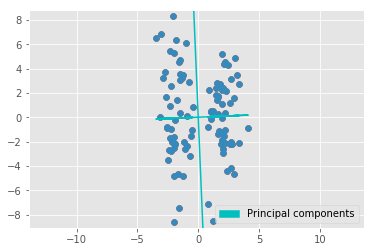

In [557]:
C = np.array([[0.5,0],[0,10]])
mu1 = np.array([-2,0])
mu2 = np.array([2,0])

data = np.vstack([np.random.multivariate_normal(mu1, C, size=50),
                  np.random.multivariate_normal(mu2, C, size=50)])
plt.scatter(data[:,0], data[:,1])
# навчимо модель pca та побудуємо головні компоненти
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model)
plt.draw()

Вочевидь, що у разі метод основних компонент вважатиме вертикальну компоненту значимішою для опису набору даних, ніж горизонтальну.

Але, наприклад, у випадку, коли дані з лівого та правого кластера відносяться до різних класів, для їхньої лінійної роздільності вертикальна компонента є шумовою. Незважаючи на це, її метод головних компонентів ніколи шумової не визнає, і є ймовірність, що відбір ознак з його допомогою викине з ваших даних значущі для задачі, що вирішується, компоненти просто тому, що вздовж них значення мають низьку дисперсію.

Справлятися з такими ситуаціями можуть деякі інші методи зменшення розмірності даних, наприклад метод незалежних компонент (ICA).